# Halveringsmetoden
---

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d9/Bisection_anime.gif" width="500px">

Figur 1: En gif som ilustrerer halveringsmetoden <a href="https://upload.wikimedia.org/wikipedia/commons/d/d9/Bisection_anime.gif">Wikipedia</a>

**Halveringsmetoden** er en enkel numerisk metode for å finna et nullpunkt til ein funksjon. Vi finner altså en løsning på likninga $f(x) = 0$. 

For å bruka metoden må vi kjenne to punkter a og b som er slik at $f(a)$ og $f(b)$ har ulikt fortegn, og  funksjonen må være kontinuerlig i intervallet $[a,b]$. Vi startar med å finne midtpunktet m mellom $a$ og $b$. Hvis  $f(m)$ og $f(a)$ har ulikt fortegn så leter vi videre i intervallet $[a,m]$. Hvis ikke fortsetter vi med intervallet $[m,b]$. 

**Algoritme**

1. Regn ut m, midtpunktet til intervallet $[a,b]$, $m = (a + b)/2$.
2. Regn ut funksjonsverdien for midtpunktet, m, $f(m)$.
3. Undersøk fortegnet til produktet $f(a) \cdot f(m)$ og erstatt b med m hvis produktet er negativ og a med m hvis det er positivt, slik at nullpunktet eksisterer i det nye intervallet.


**Pseudokode:**

```python
 Gitt funksjonen f med parametere a, b, og N.
	gjenta N ganger
		m = (a + b)/2		
		hvis f(m) = 0
			avslutt	
		hvis f(a)・f(m) < 0
			b = m
		ellers
			a = m
```

**Flytskjema**

<img src="bilder/halveringsmetoden-2.svg" width="500px">


**Biblioteker**

In [39]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

## Implementasjon av halveringsmetoden
---

In [40]:
def halveringsmetoden(f, a, b, N):
    m_list = []; 
    for n in range(N):
        m = (a + b)/2
        m_list.append(m);

        if f(m) == 0:
            break
        elif f(a)*f(m) < 0:
            b = m
        else:
            a = m
        
    return m, m_list

## Noen eksempler
---


### Eksempel 1 

**Løs likningen, $f(x)=2x-4=0$, numerisk.**


Vi starter med å definere $f(x)=2x-4$

In [41]:
def f(x):
    return 2*x-4

Løser likningen $f(x)=0$ ved hjelp av halveringsmetoden

For å bestemme intervallet vi skal lete i tegner vi først grafen:

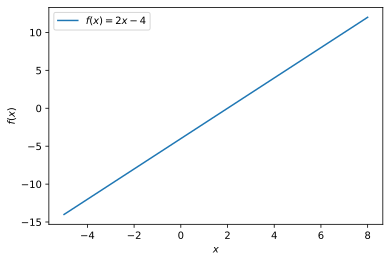

In [42]:
x = np.linspace(-5,8,1000) # 1000 x-verdier fra -6 til 6
plt.xlabel('$x$') # Merker x-aksen
plt.ylabel('$f(x)$') # Merker y-aksen
plt.plot(x, f(x), label='$f(x)=2x-4$') # Tegner f(x) 
plt.legend() # Infoboksen øverst i hjørnet. Bruker data fra label
plt.show()

Vi bestemmer et intervall nullpunktet ligger innenfor, $$x\in[-3, 5]$$

og setter $a=-3$ og $b=5$.

Maks antall iterasjoner setter vi til 10

In [43]:
x, steg = halveringsmetoden(f, -3, 5, 10)

Skriver ut løsningen til likningen

In [44]:
print(f'x = {x:.4f}')

x = 2.0000


Ser vi på stegene til m

In [45]:
print(steg)

[1.0, 3.0, 2.0]


```python
halveringsmetoden(f, -3, 5, 8)
```

Steg 1:

$a = -3$ og $b = 5$ så blir

$m = \frac{-3 + 5}{2} = \frac{2}{2} = 1$



<img src="bilder/fa_1.png" width="500px">


Steg 2:

siden $f(-3)\cdot f(1) = -10 \cdot (-2) = 20 > 0$

setter vi $a = m = 1$

som fører til at $m = 3$


<img src="bilder/fa_2.png" width="500px">



Steg 3:

siden $f(1)\cdot f(3) = -2 \cdot (2) = -4 < 0$

setter vi $b = m = 3$

som fører til at $m = 2$

siden $f(2)=0$ så avslutter vi 

<img src="bilder/fa_3.png" width="500px">

Likningen $f(x)=2x-4=0$ har løsningen: $x_1 \approx 2.0000$

### Eksempel 2
---

**Løs likningen, $f(x)=x^2-16=0$, numerisk.**

Vi starter med å definere $f(x)=x^2-16$

In [46]:
def g(x):
    return x**2 - 16

Det er lurt å tegne grafen til funksjonen før vi bestemmer området vi skal lete etter nullpunktene.

In [47]:
x = np.linspace(-6,6,1000) # 1000 x-verdier fra -6 til 6

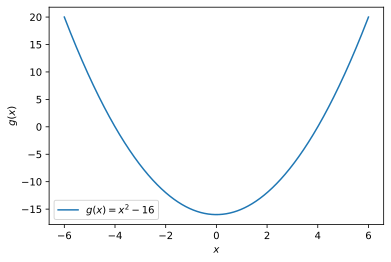

In [48]:
plt.xlabel('$x$') # Merker x-aksen
plt.ylabel('$g(x)$') # Merker y-aksen
plt.plot(x, g(x), label='$g(x)=x^2-16$') # Tegner g(x) 
plt.legend() # Infoboksen øverst i hjørnet. Bruker data fra label
plt.show()

Vi ser at $g(x)$ har 2 nullpunkt. 

Algoritmen vi har brukt finner kun ett nullpunkt. Derfor må vi bestemme et passende intervall for hvert av nullpunktene.

Det første nullpunktet finner vi mellom -6 og 0

In [49]:
x, steg = halveringsmetoden(g, -6, 0, 18)
print(f'x_1 = {x:.4f}')

x_1 = -4.0000


Det andre nullpunktet ligger mellom 0 og 6

In [50]:
x, steg = halveringsmetoden(g, 0, 6, 17)
print(f'x_2 = {x:.4f}')

x_2 = 4.0000


Likningen $f(x)=x^2-16=0$ har løsningene:

$$x_1 \approx -4.0000 \wedge x_2 \approx 4.0000$$

Plot som viser tilnærmelsen til nullpunktet for hver iterasjon.

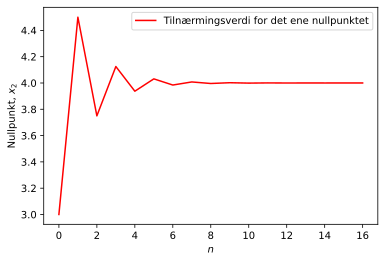

In [51]:
plt.xlabel('$n$') # Merker x-aksen
plt.ylabel('Nullpunkt, $x_2$') # Merker y-aksen
plt.plot(steg, 'r', label='Tilnærmingsverdi for det ene nullpunktet') # Tegner m i de ulike stegene 
plt.legend() # Infoboksen øverst i hjørnet. Bruker data fra label
plt.show()

Vi ser at algoritmen kommer raskt frem til en god tilnærming til nullpunktet

### Eksempel 3
---

**Løs likningen, $h(x) = 1.3^x + x^2 − x − 4=0$, numerisk.**

Grunnen til at vi løser likninger numerisk er fordi de ikke lar seg løse eksakt.

Her ser vi et eksempel på deg i CAS i GeoGebra
<img src='bilder/CAS.png' width='400px'>

Vi starter med å definere $h(x) = 1.3^x + x^2 − x − 4$

In [52]:
def h(x):
    return 1.3**x + x**2 - x - 4

Det er lurt å tegne grafen til funksjonen før vi bestemmer området vi skal lete etter nullpunktene.

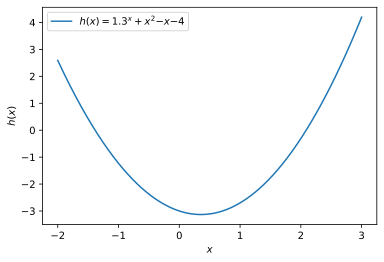

In [53]:
x = np.linspace(-2,3,1000)

plt.xlabel('$x$') # Merker x-aksen
plt.ylabel('$h(x)$') # Merker y-aksen
plt.plot(x, h(x), label='$h(x)= 1.3^x + x^2 − x − 4$') # Tegner g(x) 
plt.legend() # Infoboksen øverst i hjørnet. 
plt.show()

In [54]:
x, steg = halveringsmetoden(h, -2, 0, 17)
print(f'x_1 = {x:.4f}')

x_1 = -1.3854


In [55]:
x, steg = halveringsmetoden(h, 0, 3, 17)
print(f'x_2 = {x:.4f}')

x_2 = 2.0877


Likningen $h(x) = 1.3^x + x^2 − x − 4=0$ løsningene:

$$x_1 \approx -1.3854 \wedge x_2 \approx 2.0877$$


I GeoGebra kan vi bruke NLøs hvis vi ønsker å løse likninger numerisk:

<img src="bilder/NLos.png" width="400px">

Plot som viser hvordan algoritmen nærmer seg nullpunktet for hver iterasjon. 

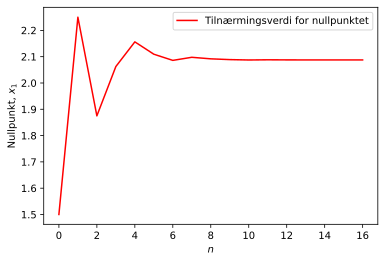

In [56]:
plt.xlabel('$n$') # Merker x-aksen
plt.ylabel('Nullpunkt, $x_1$') # Merker y-aksen
plt.plot(steg, 'r', label='Tilnærmingsverdi for nullpunktet') # Stegene 
plt.legend() # Infoboksen øverst i hjørnet. Bruker data fra label
plt.show()

## Halveringsalgoritmefunksjon

Halveringsmetoden uten return av liste med stegne og med en "default" verdi for N

Når man kaller på funksjonen trenger man da bare de tre første argumentene.

F.eks ```halveringsmetoden(f, -1, 2)``` hvis man skal finne nulpunktet til en funksjon $f$ i intervallet $x\in[-1, 2]$.

In [57]:
def halveringsmetoden(f, a, b, N=17):
    for n in range(N):
        m = (a + b)/2
        if f(m) == 0:
            break
        elif f(a)*f(m) < 0:
            b = m
        else:
            a = m
        
    return m

## Oppgaver
---

### Oppgave 1

Bruk halveringsmetoden til å finne eventuelle nullpunkt til

$$f(x)=x^3+2$$

Sammenlikn svaret med det du får i CAS i GeoGebra

### Oppgave 2

Bruk halveringsmetoden til å finne nullpunktene til

$$g(x)=x^(2)-3 x-2$$

Sammenlikn svaret med det du får i CAS i GeoGebra

### Oppgave 3

Bruk halveringsmetoden til å finne nullpunktene til

$$f(x)=2^x-x^2$$

Sammenlikn svaret med det du får i CAS i GeoGebra